<h1 align=center>Revealing the Training Secrets of DeepSeek</h1>

An in-depth insight into the DeepSeek LLM model based on the research paper, with a clear and simple explanation for easy comprehension. At the end covering how other LLMs are trained (GPT).

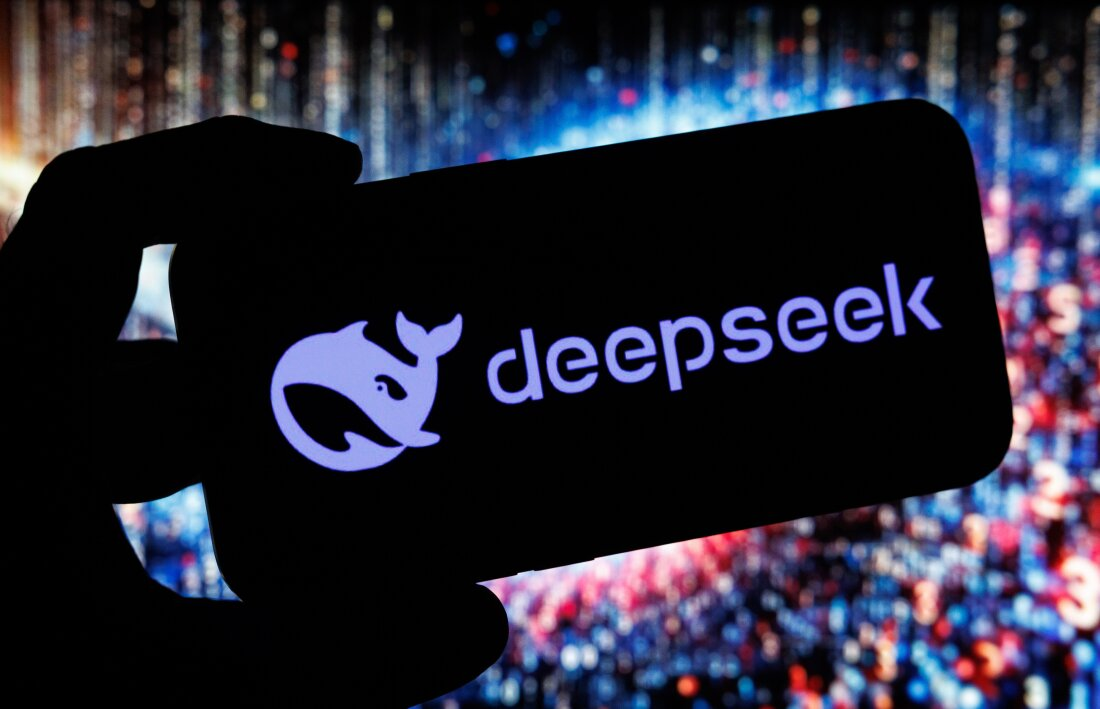

`Contents`
- How DeepSeek`s LLM Model is trained
- How are other LLM models trained (GPT)

## Step-by-step DeepSeek’s training methodology based on the research paper:

1. Introduction to the Study:
- This research focuses on improving how language models think and solve problems by using pure reinforcement learning (RL), which means training the model without any pre-prepared example data.

2. Starting Point:
- The researchers started with a base model called DeepSeek-V3-Base.
- They used a method called GRPO (Group Relative Policy Optimization) to guide the training process.

3. Training DeepSeek-R1-Zero:
- As the model trained using RL, it naturally developed smart and interesting reasoning abilities.
- After many training steps, the model’s performance improved dramatically, with its pass rate increasing from 15.6% to 71.0% on the AIME 2024 benchmark.
- By using a voting method, this score further improved to 86.7%, matching another high-performing model called OpenAI-o1–0912.

4. Challenges of DeepSeek-R1-Zero:
- Despite its success, the model had problems:
- Poor readability: Responses were hard to understand.
- Language mixing: Sometimes different languages appear in the same response.

5. Creating DeepSeek-R1:
- To fix these issues, they developed DeepSeek-R1. The pipeline incorporates two RL stages aimed at discovering improved reasoning patterns and aligning with human preferences, as well as two SFT stages that serve as the seed for the model’s reasoning and non-reasoning capabilities.
- DeepSeek-R1 which followed a multi-step training process:

5.1. Cold-start data: They first collected thousands of carefully selected examples to fine-tune the DeepSeek-V3-base model.

5.2. Reasoning-focused RL: They trained the model further to improve its reasoning abilities, similar to DeepSeek-R1-Zero.

5.3. New training data: Upon nearing convergence in the RL process, they created new SFT data through rejection sampling on the RL checkpoint, combined with supervised data from DeepSeek-V3 in domains such as writing, factual QA, and self-cognition, and then retrained the DeepSeek-V3-Base model.

5.4. Final RL process (RL For Human Alignment): After fine-tuning with the new data, the checkpoint undergoes an additional RL process to handle all kinds of tasks.

This resulted in DeepSeek-R1, which performed as well as OpenAI-o1–1217.

6. Model Distillation:
- They further made smaller versions of DeepSeek-R1 by “distilling” its knowledge into smaller models (from 1.5B to 70B parameters).
- The distilled models performed better than models trained directly with RL.
- Notably, the 14B model outperformed the well-known QwQ-32B-Preview.

7. Open Source Contribution:
- They made the distilled models (including versions of Qwen and Llama) available to the research community.

8. Performance Highlights

`Reasoning Tasks:`
- 79.8% on AIME 2024, surpassing OpenAI-o1–1217.
- 97.3% on MATH-500, matching OpenAI models.

`Coding:`
- Achieved a 2,029 Elo rating on Codeforces, better than 96.3% of human participants.

`Knowledge:`
- High scores on MMLU (90.8%) and GPQA Diamond (71.5%), demonstrating strong educational task performance.

`Other Tasks:`
- Excellent in creative writing, summarization, and handling long-context queries.

## How Other LLM Models are Trained (GPT)

![llm2.png](attachment:llm2.png)


### Stages of Training:

**Stage 1 — Pre-training:** 

- In this phase, Large Language Models (LLMs) like GPT-3 are trained on a massive dataset from the internet to predict the next word in a sequence of text.
- The data is cleaned, preprocessed, and tokenized, and transformer architectures are commonly used for this purpose.
- The model learns language patterns but doesn’t yet understand instructions or questions.

**Stage 2 — Supervised Fine-Tuning or Instruction Tuning:**

- In this stage, the model is provided with user messages as input and AI trainer responses as targets.
- The model learns to generate responses by minimizing the difference between its predictions and the provided responses.
- It begins to understand instructions and learns to retrieve knowledge based on them.

**Stage 3 — Reinforcement Learning from Human Feedback (RLHF)**: 

- RLHF is applied as a second fine-tuning step to align the model with human preferences, focusing on being helpful, honest, and harmless (HHH).
- RLHF helps improve the model’s behavior and alignment with human values, ensuring it provides useful, truthful, and safe responses.

This involves two sub-steps:

- **Training Reward Model Using Human Feedback:** Multiple model outputs for the same prompt are generated and ranked by human labelers to create a reward model. This model learns human preferences for HHH content.
- **Replacing Humans with Reward Model for Large-Scale Training:** Once the reward model is trained, it can replace humans in labeling data. Feedback from the reward model is used to further fine-tune the LLM at a large scale.

`Note:`For more details, click on this link: [Discover How ChatGPT is Trained!](https://www.linkedin.com/pulse/discover-how-chatgpt-istrained-pradeep-menon/)